(1)Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\user\Downloads\Employee.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
print(df.shape)

(148, 6)


In [8]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [9]:

df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [10]:
for col in df.columns:                          
    unique_values = df[col].unique()
    print(f'Column:{col}')
    print(f'Number of unique values: {len(unique_values)}\n')

Column:Company
Number of unique values: 7

Column:Age
Number of unique values: 30

Column:Salary
Number of unique values: 41

Column:Place
Number of unique values: 12

Column:Country
Number of unique values: 1

Column:Gender
Number of unique values: 2



#Data Cleaning



In [12]:
df.isnull().sum()   ##missing values

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
#filling with missing values with mode and median
df['Company'].fillna(df['Company'].mode()[0], inplace=True)
df['Place'].fillna(df['Place'].mode()[0], inplace=True)


df['Age'].fillna(df['Age'].median(), inplace=True)


df['Salary'] = df.groupby('Company')['Salary'].transform(lambda x: x.fillna(x.median()))


print(df.isnull().sum())

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13708\1514356337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna(df['Company'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13708\1514356337.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [14]:
#Removeing duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(142, 6)


In [15]:

df['Age'].replace(0, np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13708\2401775087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)


In [16]:
#Finding outliers
df.describe()

,Age,Salary,Gender
count,136.000000,142.000000,142.000000
mean,32.084559,5097.732394,0.225352
std,8.475795,2459.829288,0.419293
min,17.000000,1089.000000,0.000000
25%,23.000000,3000.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,36.250000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


<Axes: ylabel='Age'>

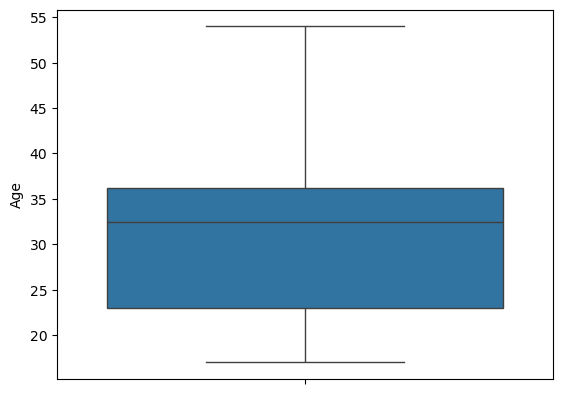

In [17]:

sns.boxplot(df['Age'])



<Axes: ylabel='Salary'>

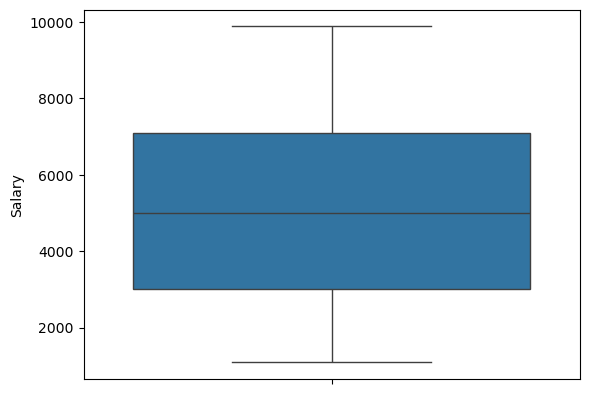

In [18]:
sns.boxplot(df['Salary'])


As per the boxplots there is no outliers in both Age and Salary column.

#DATA ANALYSIS

In [21]:
#Filter the data with age >40 and salary<5000
filtered_df = df[(df['Age']>40) & (df['Salary'] < 5000)]
print (filtered_df)

     Company   Age  Salary      Place Country  Gender
12       CTS  45.0  2934.0    Chennai   India       0
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
48       CTS  43.0  2934.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
66       CTS  41.0  2934.0   Calcutta   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
102      CTS  44.0  2934.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
120      CTS  44.0  2934.0  Hyderabad   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0  

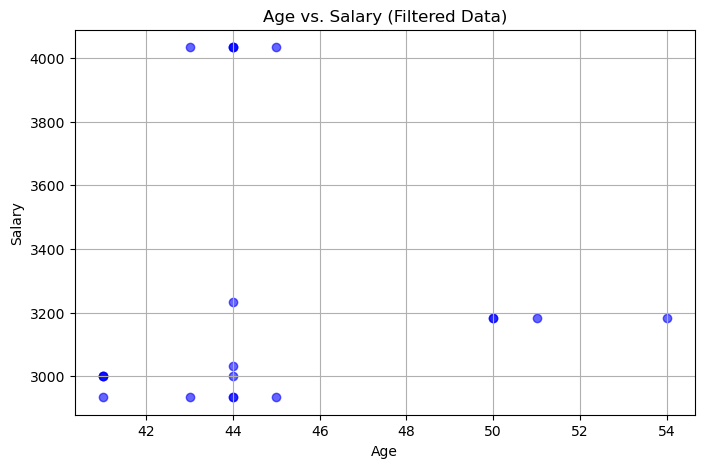

In [22]:
#Plot the chart with age and salary

plt.figure(figsize=(8, 5))  
plt.scatter(filtered_df['Age'], filtered_df['Salary'], color='b', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary (Filtered Data)')
plt.grid(True)
plt.show()

Most salaries seem to cluster around 3000-4000

C:\Users\user\AppData\Local\Temp\ipykernel_13708\1112955424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')


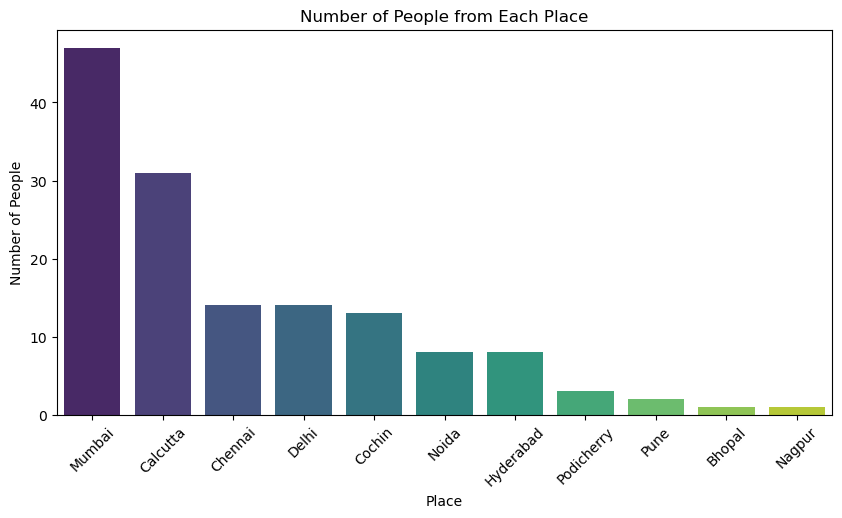

In [24]:
#Count the number of people from each place and represent it visually

place_counts = df['Place'].value_counts()  # Count occurrences of each place

plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.show()

From the barplot its clear that Most number of employees are from Mumbai and Nagpur is the plca were least number of employees are from.

Data Encoding

In [27]:
#converting categorical variables into numerical representations using one hot encoder since its nominal data with fewer number

In [28]:

df = pd.get_dummies(df, columns=['Company', 'Place', 'Country'], drop_first=True)
df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_13708\211584606.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      1
2      0
3      1
4      0
      ..
142    0
143    0
145    1
146    0
147    1
Name: Company_Infosys, Length: 142, dtype: int32' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_13708\211584606.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      0
2      0
3      0
4      0
      ..
142    1
143    0
145    0
146    0
147    0
Name: Company_Infosys Pvt Lmt, Length: 142, dtype: int32' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_13708\211584606.py:2:

In [29]:
df.head()

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5034.0,0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30.0,5000.0,0,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.0,0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.0,0,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.0,0,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_cols = ['Age', 'Salary']
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])
print("Standard Scaled Data:")
df_std.head()

Standard Scaled Data:


,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.431044,-0.026001,0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-0.246852,-0.039872,0,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.345244,-1.141395,0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.937340,-0.855815,0,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-1.075786,-0.447843,0,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [32]:

scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df_mm[num_cols])

print("MinMax Scaled Data:")
df_mm.head()

MinMax Scaled Data:


,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,0.081081,0.448959,0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0.351351,0.445089,0,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.486486,0.137817,0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.621622,0.217480,0,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.162162,0.331285,0,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0
